# Audio Processing with Librosa

This notebook demonstrates basic audio processing techniques using librosa, including loading files, format conversion, and Mel spectrogram analysis.

## 1. Loading Audio Files

Librosa can load various audio formats and automatically handles sample rate conversion.

In [1]:
import librosa
from IPython.display import Audio, display

# Load audio file - replace with your file path
audio_file = "LJ037-0171.wav"

# Load with native sample rate
# (i.e., the sample rate written in the header of the WAV file)
y, sr = librosa.load(audio_file, sr=None)

# y is now a numpy.array
print(f"Audio shape: {y.shape}")
print(f"Sample rate: {sr} Hz")
# Duration is simply the number of samples
# divided by the sample rate
print(f"Duration: {len(y)/sr:.2f} seconds")

# Display audio widget
Audio(y, rate=sr)

Audio shape: (167226,)
Sample rate: 22050 Hz
Duration: 7.58 seconds


## 2. Audio Format and Bitrate Conversion

Convert between different sample rates and save in various formats.

In [4]:
# Load with specific sample rate
# The audio will be re-sampled from the native
# sample rate to the specified sample rate
y_16k, sr_16k = librosa.load(audio_file, sr=16000)

y_44k, sr_44k = librosa.load(audio_file, sr=44100)

print(f"Original: {len(y)} samples at {sr} Hz")
print(f"16 kHz: {len(y_16k)} samples at {sr_16k} Hz")
print(f"44.1 kHz: {len(y_44k)} samples at {sr_44k} Hz")

Original: 167226 samples at 22050 Hz
16 kHz: 121344 samples at 16000 Hz
44.1 kHz: 334452 samples at 44100 Hz


We can also easily convert to whatever format is supported by using `soundfile`:

In [5]:
import soundfile as sf

# Save y as FLAC (lossless)
sf.write('output.flac', y, sr)

# Save y as OGG (lossy, Vorbis codec)
sf.write('output.ogg', y, sr, format='OGG', subtype='VORBIS')

# Save y as WAV with 16-bit PCM
sf.write('output_pcm16.wav', y, sr, subtype='PCM_16')

# Save y as WAV with 24-bit PCM
sf.write('output_pcm24.wav', y, sr, subtype='PCM_24')

# Note: soundfile does not support setting MP3 bitrate directly.
# Instead, you can use the compression level to control that
sf.write("output_mp3_CBR.mp3", y, sr, bitrate_mode='CONSTANT', compression_level=0.5)
sf.write("output_mp3_VBR.mp3", y, sr, bitrate_mode='VARIABLE', compression_level=0.5)

print("Saved y in FLAC, OGG, WAV (16/24-bit), and MP3 (320k) formats.")

Saved y in FLAC, OGG, WAV (16/24-bit), and MP3 (320k) formats.


## 3. Creating Mel Spectrograms

Mel spectrograms represent audio in a perceptually-motivated frequency scale. They are important as they constitute the input of many state-of-the-art audio models.

[Text(0.5, 1.0, 'Mel Spectrogram of Voice Signal')]

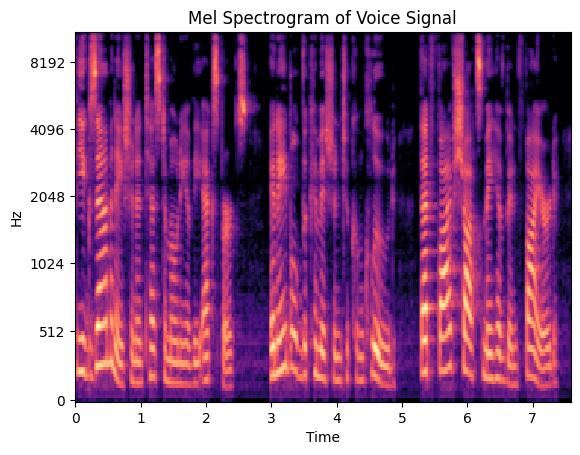

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display


mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

fig, sub = plt.subplots()
librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel', ax=sub)
sub.set(title='Mel Spectrogram of Voice Signal')


## 4. Comparing Different Audio Types

Let's compare mel spectrograms of voice, music, and ambient noise.

In [7]:
# Generate synthetic examples for demonstration
duration = 5  # seconds
sr = 22050
t = np.linspace(0, duration, int(sr * duration))

# 1. Voice
voice = librosa.load('LJ037-0171.wav', sr=sr)[0][:len(t)]

# 2. Music
music = librosa.load("piano.mp3", sr=sr)[0][:len(t)]

# 3. Noise (filtered white noise)
noise = np.random.normal(0, 0.1, len(t))
# Simple low-pass filter
from scipy.signal import butter, filtfilt
b, a = butter(3, 0.1)
ambient = filtfilt(b, a, noise)

display(Audio(voice, rate=sr))
display(Audio(music, rate=sr))
display(Audio(ambient, rate=sr))

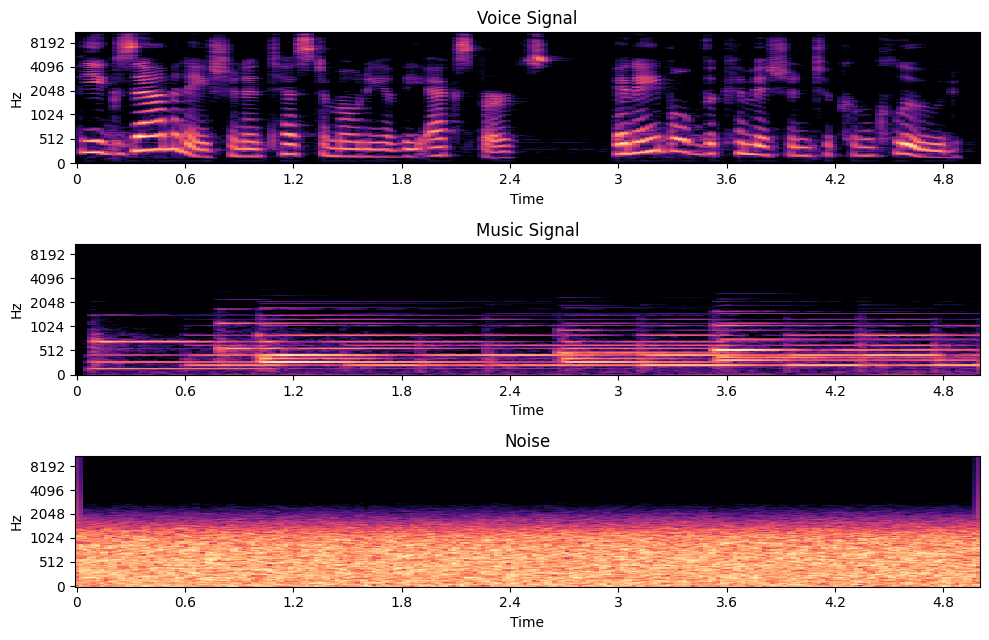

In [13]:
# Create comparison plot
fig, axes = plt.subplots(3, 1, figsize=(10, 6.5))

audio_types = [
    (voice, "Voice Signal"),
    (music, "Music Signal"),
    (ambient, "Noise"),
]

for i, (audio, title) in enumerate(audio_types):
    # Compute mel spectrogram
    mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=256)

    # Normalize to 0 dB
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

    # Plot
    librosa.display.specshow(
        mel_spec_db,
        sr=sr,
        x_axis="time",
        y_axis="mel",
        ax=axes[i],
        # Put all plots on the same scale to 
        # make comparison easier
        vmin=-60,
        vmax=0,
        cmap="magma",
    )
    axes[i].set_title(title)

plt.tight_layout()
plt.show()

## Key Observations

**Voice signals** typically show:
- Clear harmonic structure with formants
- Temporal patterns corresponding to speech

**Music signals** display:
- Rich harmonic content across frequency bands
- Structured patterns and rhythmic elements

**Ambient noise** characteristics:
- Broad frequency distribution
- Less structured temporal patterns
- Generally lower energy levels

## Summary

This notebook covered:
- Loading audio files with librosa
- Converting between sample rates and formats
- Creating mel spectrograms for audio analysis
- Comparing spectrograms of different audio types

Mel spectrograms are valuable for machine learning applications in audio processing, providing a compact representation that captures perceptually important features.